<a href="https://colab.research.google.com/github/Nurochman79/DataScience/blob/main/Case_Booking_Hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
dfbh=pd.read_csv('/content/sample_data/hotel_booking.csv')
dfbh.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.00,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.00,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.00,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.50,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


In [4]:
dfbh['reservation_status_date']=pd.to_datetime(dfbh['reservation_status_date'])

In [5]:
dfbh['reservation_status_date'].head(20)

0    2015-07-01
1    2015-07-01
2    2015-07-02
3    2015-07-02
4    2015-07-03
5    2015-07-03
6    2015-07-03
7    2015-07-03
8    2015-05-06
9    2015-04-22
10   2015-06-23
11   2015-07-05
12   2015-07-05
13   2015-07-05
14   2015-07-05
15   2015-07-05
16   2015-07-05
17   2015-07-02
18   2015-07-02
19   2015-07-05
Name: reservation_status_date, dtype: datetime64[ns]

In [6]:
dfbh['resrv_year']=dfbh['reservation_status_date'].dt.year
dfbh['resrv_month']=dfbh['reservation_status_date'].dt.month
dfbh['resrv_day']=dfbh['reservation_status_date'].dt.day
dfbh

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34571,Resort Hotel,0,48,2017,March,12,23,2,5,2,...,0,Check-Out,2017-03-30,Anna Taylor,Taylor_Anna@comcast.net,524-328-0192,************2455,2017,3,30
34572,Resort Hotel,0,163,2017,March,13,29,0,1,2,...,1,Check-Out,2017-03-30,Ruth Williams,Williams.Ruth@outlook.com,275-261-2050,************6937,2017,3,30
34573,Resort Hotel,0,49,2017,March,13,29,0,1,1,...,1,Check-Out,2017-03-30,Steven Harrell,Harrell_Steven@att.com,958-154-4396,************9572,2017,3,30
34574,Resort Hotel,0,338,2017,March,11,16,4,10,2,...,1,Check-Out,2017-03-30,Sharon Cox,SharonCox38@gmail.com,382-741-9068,************7304,2017,3,30


In [7]:
dfbh.drop(columns=['reservation_status_date'], axis=1, inplace=True)

In [8]:
dfbh

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34571,Resort Hotel,0,48,2017,March,12,23,2,5,2,...,0,0,Check-Out,Anna Taylor,Taylor_Anna@comcast.net,524-328-0192,************2455,2017,3,30
34572,Resort Hotel,0,163,2017,March,13,29,0,1,2,...,1,1,Check-Out,Ruth Williams,Williams.Ruth@outlook.com,275-261-2050,************6937,2017,3,30
34573,Resort Hotel,0,49,2017,March,13,29,0,1,1,...,0,1,Check-Out,Steven Harrell,Harrell_Steven@att.com,958-154-4396,************9572,2017,3,30
34574,Resort Hotel,0,338,2017,March,11,16,4,10,2,...,0,1,Check-Out,Sharon Cox,SharonCox38@gmail.com,382-741-9068,************7304,2017,3,30


In [9]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34576 entries, 0 to 34575
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           34576 non-null  object 
 1   is_canceled                     34576 non-null  int64  
 2   lead_time                       34576 non-null  int64  
 3   arrival_date_year               34576 non-null  int64  
 4   arrival_date_month              34576 non-null  object 
 5   arrival_date_week_number        34576 non-null  int64  
 6   arrival_date_day_of_month       34576 non-null  int64  
 7   stays_in_weekend_nights         34576 non-null  int64  
 8   stays_in_week_nights            34576 non-null  int64  
 9   adults                          34576 non-null  int64  
 10  children                        34576 non-null  float64
 11  babies                          34576 non-null  int64  
 12  meal                            

In [10]:
dfbh['resrv_year'].isna().sum()

0

In [11]:
dfbh['resrv_month'].isna().sum()

0

In [12]:
dfbh['resrv_day'].isna().sum()

0

In [13]:
dfbh['resrv_year'].value_counts()

2016    18997
2015     8694
2017     6884
2014        1
Name: resrv_year, dtype: int64

In [14]:
dfbh['resrv_month'].value_counts()

3     3529
10    3428
1     3424
2     3287
7     3007
8     2993
11    2805
9     2677
12    2554
4     2420
5     2289
6     2163
Name: resrv_month, dtype: int64

In [15]:
dfbh['resrv_day'].value_counts()

15    1300
29    1273
12    1271
17    1260
19    1256
21    1215
26    1208
20    1203
18    1194
9     1174
6     1164
2     1158
3     1147
30    1136
4     1127
16    1117
11    1107
28    1105
10    1102
22    1080
8     1077
27    1075
5     1063
23    1050
25    1049
13    1047
24    1035
14    1033
1      988
7      934
31     628
Name: resrv_day, dtype: int64

In [16]:
dfbh['resrv_year'].fillna(2016.0,inplace=True)

In [17]:
dfbh['resrv_month'].fillna(1.0,inplace=True)

In [18]:
dfbh['resrv_day'].fillna(21.0, inplace=True)

In [19]:
dfbh['resrv_year'].isna().sum()

0

In [20]:
dfbh['resrv_day'].isna().sum()

0

In [21]:
dfbh['resrv_year']=dfbh['resrv_year'].astype('int64')

In [22]:
dfbh['resrv_month']=dfbh['resrv_month'].astype('int64')

In [23]:
dfbh['resrv_day']=dfbh['resrv_day'].astype('int64')

In [24]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34576 entries, 0 to 34575
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           34576 non-null  object 
 1   is_canceled                     34576 non-null  int64  
 2   lead_time                       34576 non-null  int64  
 3   arrival_date_year               34576 non-null  int64  
 4   arrival_date_month              34576 non-null  object 
 5   arrival_date_week_number        34576 non-null  int64  
 6   arrival_date_day_of_month       34576 non-null  int64  
 7   stays_in_weekend_nights         34576 non-null  int64  
 8   stays_in_week_nights            34576 non-null  int64  
 9   adults                          34576 non-null  int64  
 10  children                        34576 non-null  float64
 11  babies                          34576 non-null  int64  
 12  meal                            

In [25]:
dfbh.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2015,7,3
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263,2015,7,3
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,Check-Out,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994,2015,7,3
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,1,Check-Out,William Velez,Velez_William@mail.com,286-669-4333,************8729,2015,7,3
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,1,Canceled,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,2015,5,6
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,0,Canceled,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,2015,4,22


In [26]:
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('January','1')

In [27]:
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('February','2')

In [28]:
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('March','3')

In [29]:
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('April','4')

In [30]:
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('May','5')

In [31]:
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('June','6')

In [32]:
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('July','7')

In [33]:
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('August','8')

In [34]:
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('September','9')

In [35]:
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('October','10')

In [36]:
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('November','11')

In [37]:
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('December','12')

In [38]:
dfbh['arrival_date_month'].head(20)

0     7
1     7
2     7
3     7
4     7
5     7
6     7
7     7
8     7
9     7
10    7
11    7
12    7
13    7
14    7
15    7
16    7
17    7
18    7
19    7
Name: arrival_date_month, dtype: object

In [39]:
dfbh[~dfbh['arrival_date_month'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34571,Resort Hotel,0,48,2017,3,12,23,2,5,2,...,0,0,Check-Out,Anna Taylor,Taylor_Anna@comcast.net,524-328-0192,************2455,2017,3,30
34572,Resort Hotel,0,163,2017,3,13,29,0,1,2,...,1,1,Check-Out,Ruth Williams,Williams.Ruth@outlook.com,275-261-2050,************6937,2017,3,30
34573,Resort Hotel,0,49,2017,3,13,29,0,1,1,...,0,1,Check-Out,Steven Harrell,Harrell_Steven@att.com,958-154-4396,************9572,2017,3,30
34574,Resort Hotel,0,338,2017,3,11,16,4,10,2,...,0,1,Check-Out,Sharon Cox,SharonCox38@gmail.com,382-741-9068,************7304,2017,3,30


In [40]:
dfbh['arrival_date_month'].value_counts()

8     3843
10    3555
7     3538
3     3113
9     3108
2     3101
12    2648
4     2514
5     2445
11    2437
1     2193
6     2081
Name: arrival_date_month, dtype: int64

In [41]:
dfbh[~dfbh['arrival_date_month'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34571,Resort Hotel,0,48,2017,3,12,23,2,5,2,...,0,0,Check-Out,Anna Taylor,Taylor_Anna@comcast.net,524-328-0192,************2455,2017,3,30
34572,Resort Hotel,0,163,2017,3,13,29,0,1,2,...,1,1,Check-Out,Ruth Williams,Williams.Ruth@outlook.com,275-261-2050,************6937,2017,3,30
34573,Resort Hotel,0,49,2017,3,13,29,0,1,1,...,0,1,Check-Out,Steven Harrell,Harrell_Steven@att.com,958-154-4396,************9572,2017,3,30
34574,Resort Hotel,0,338,2017,3,11,16,4,10,2,...,0,1,Check-Out,Sharon Cox,SharonCox38@gmail.com,382-741-9068,************7304,2017,3,30


In [42]:
dfbh=dfbh.astype({'arrival_date_month':'int'})

In [43]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9865 entries, 0 to 9864
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           9865 non-null   object 
 1   is_canceled                     9865 non-null   int64  
 2   lead_time                       9865 non-null   int64  
 3   arrival_date_year               9865 non-null   int64  
 4   arrival_date_month              9865 non-null   int64  
 5   arrival_date_week_number        9865 non-null   int64  
 6   arrival_date_day_of_month       9865 non-null   int64  
 7   stays_in_weekend_nights         9865 non-null   int64  
 8   stays_in_week_nights            9865 non-null   int64  
 9   adults                          9865 non-null   int64  
 10  children                        9865 non-null   float64
 11  babies                          9865 non-null   int64  
 12  meal                            98

In [43]:
dfbh.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,resrv_year,resrv_month,resrv_day
count,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,...,34576.000000,27074.000000,2833.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000
mean,0.321610,89.959654,2015.982097,6.655368,27.699069,15.749075,1.163177,3.067301,1.857531,0.123496,...,0.270419,215.866219,237.584539,0.574387,89.576216,0.130235,0.578407,2015.947594,6.349983,15.916532
std,0.467101,96.738557,0.680222,3.359076,14.766051,8.854075,1.146826,2.460766,0.732989,0.438912,...,0.695977,85.316193,124.267506,7.766339,58.639576,0.343204,0.790168,0.669273,3.541616,8.758703
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,0.000000,10.000000,2016.000000,4.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,240.000000,154.000000,0.000000,48.000000,0.000000,0.000000,2015.000000,3.000000,8.000000
50%,0.000000,53.000000,2016.000000,7.000000,29.000000,16.000000,1.000000,3.000000,2.000000,0.000000,...,0.000000,240.000000,223.000000,0.000000,70.870000,0.000000,0.000000,2016.000000,7.000000,16.000000
75%,1.000000,148.000000,2016.000000,9.000000,40.000000,24.000000,2.000000,5.000000,2.000000,0.000000,...,0.000000,242.000000,329.000000,0.000000,115.200000,0.000000,1.000000,2016.000000,10.000000,23.000000
max,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,17.000000,531.000000,543.000000,185.000000,508.000000,8.000000,5.000000,2017.000000,12.000000,31.000000


In [44]:
dfbh['phone-number']=dfbh['phone-number'].str.replace('-','')

In [45]:
dfbh['phone-number'].head(20)

0     6697921661
1     8586376955
2     6528852745
3     3646568427
4     7132265883
5     1902716743
6     4203325209
7     2866694333
8     3417265787
9     3166486176
10    8338877898
11    8043834080
12    2110712173
13    4350758409
14    7907467471
15    6493845387
16    3314308824
17    5733069938
18    4664242102
19    8966421049
Name: phone-number, dtype: object

In [46]:
dfbh['phone-number'].value_counts()

6697921661    1
8696525653    1
9438637348    1
1187112279    1
8039371882    1
             ..
7268409377    1
2477931181    1
1160985802    1
4798942727    1
3827419068    1
Name: phone-number, Length: 34575, dtype: int64

In [47]:
dfbh['phone-number'].isna().sum()

1

In [48]:
dfbh['phone-number'].fillna('6697921661', inplace=True)

In [49]:
dfbh[~dfbh['phone-number'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,6697921661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,8586376955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,6528852745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,3646568427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,7132265883,************5498,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34571,Resort Hotel,0,48,2017,3,12,23,2,5,2,...,0,0,Check-Out,Anna Taylor,Taylor_Anna@comcast.net,5243280192,************2455,2017,3,30
34572,Resort Hotel,0,163,2017,3,13,29,0,1,2,...,1,1,Check-Out,Ruth Williams,Williams.Ruth@outlook.com,2752612050,************6937,2017,3,30
34573,Resort Hotel,0,49,2017,3,13,29,0,1,1,...,0,1,Check-Out,Steven Harrell,Harrell_Steven@att.com,9581544396,************9572,2017,3,30
34574,Resort Hotel,0,338,2017,3,11,16,4,10,2,...,0,1,Check-Out,Sharon Cox,SharonCox38@gmail.com,3827419068,************7304,2017,3,30


In [50]:
dfbh=dfbh.astype({'phone-number':'int'})

In [51]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34576 entries, 0 to 34575
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           34576 non-null  object 
 1   is_canceled                     34576 non-null  int64  
 2   lead_time                       34576 non-null  int64  
 3   arrival_date_year               34576 non-null  int64  
 4   arrival_date_month              34576 non-null  int64  
 5   arrival_date_week_number        34576 non-null  int64  
 6   arrival_date_day_of_month       34576 non-null  int64  
 7   stays_in_weekend_nights         34576 non-null  int64  
 8   stays_in_week_nights            34576 non-null  int64  
 9   adults                          34576 non-null  int64  
 10  children                        34576 non-null  float64
 11  babies                          34576 non-null  int64  
 12  meal                            

In [52]:
dfbh.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,6697921661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,8586376955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,6528852745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,3646568427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,7132265883,************5498,2015,7,3


In [53]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34576 entries, 0 to 34575
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           34576 non-null  object 
 1   is_canceled                     34576 non-null  int64  
 2   lead_time                       34576 non-null  int64  
 3   arrival_date_year               34576 non-null  int64  
 4   arrival_date_month              34576 non-null  int64  
 5   arrival_date_week_number        34576 non-null  int64  
 6   arrival_date_day_of_month       34576 non-null  int64  
 7   stays_in_weekend_nights         34576 non-null  int64  
 8   stays_in_week_nights            34576 non-null  int64  
 9   adults                          34576 non-null  int64  
 10  children                        34576 non-null  float64
 11  babies                          34576 non-null  int64  
 12  meal                            

In [54]:
dfbh.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [55]:
dfbh['agent'].isna().sum()

7502

In [56]:
dfbh['agent'].value_counts()

240.0    12177
250.0     2234
241.0     1255
314.0      784
242.0      660
         ...  
34.0         1
333.0        1
446.0        1
431.0        1
304.0        1
Name: agent, Length: 175, dtype: int64

In [57]:
dfbh['children'].isna().sum()

0

In [58]:
dfbh['country'].isna().sum()

464

In [59]:
dfbh['company'].isna().sum()

31743

In [60]:
dfbh['agent'].value_counts()

240.0    12177
250.0     2234
241.0     1255
314.0      784
242.0      660
         ...  
34.0         1
333.0        1
446.0        1
431.0        1
304.0        1
Name: agent, Length: 175, dtype: int64

In [61]:
dfbh['agent'].fillna(240.0, inplace=True)

In [62]:
dfbh['agent'].isna().sum()

0

In [63]:
dfbh['children'].replace(np.nan,dfbh['children'].mean(), inplace=True)

In [64]:
dfbh['children'].isna().sum()

0

In [65]:
dfbh['country'].replace(np.nan, dfbh['country'].mean, inplace=True)

In [66]:
dfbh['country'].isna().sum()

0

In [67]:
dfbh.drop('company', axis=1, inplace=True)

In [68]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34576 entries, 0 to 34575
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           34576 non-null  object 
 1   is_canceled                     34576 non-null  int64  
 2   lead_time                       34576 non-null  int64  
 3   arrival_date_year               34576 non-null  int64  
 4   arrival_date_month              34576 non-null  int64  
 5   arrival_date_week_number        34576 non-null  int64  
 6   arrival_date_day_of_month       34576 non-null  int64  
 7   stays_in_weekend_nights         34576 non-null  int64  
 8   stays_in_week_nights            34576 non-null  int64  
 9   adults                          34576 non-null  int64  
 10  children                        34576 non-null  float64
 11  babies                          34576 non-null  int64  
 12  meal                            

In [69]:
dfbh.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,6697921661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,8586376955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,6528852745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,3646568427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,7132265883,************5498,2015,7,3
5,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,1,Check-Out,Jasmine Fletcher,JFletcher43@xfinity.com,1902716743,************9263,2015,7,3
6,Resort Hotel,0,0,2015,7,27,1,0,2,2,...,0,0,Check-Out,Dylan Rangel,Rangel.Dylan@comcast.net,4203325209,************6994,2015,7,3
7,Resort Hotel,0,9,2015,7,27,1,0,2,2,...,0,1,Check-Out,William Velez,Velez_William@mail.com,2866694333,************8729,2015,7,3
8,Resort Hotel,1,85,2015,7,27,1,0,3,2,...,0,1,Canceled,Steven Murphy,Steven.Murphy54@aol.com,3417265787,************3639,2015,5,6
9,Resort Hotel,1,75,2015,7,27,1,0,3,2,...,0,0,Canceled,Michael Moore,MichaelMoore81@outlook.com,3166486176,************9190,2015,4,22


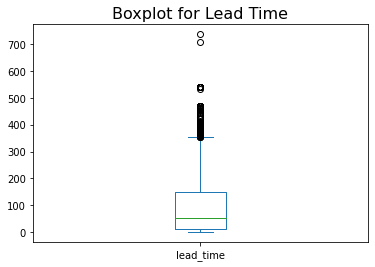

In [70]:
dfbh['lead_time'].plot(kind='box')
plt.title('Boxplot for Lead Time', size=16)
plt.show()

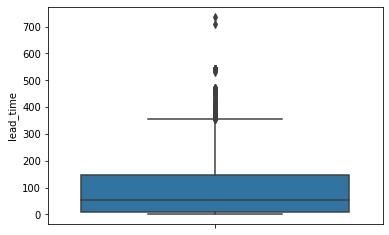

In [71]:
sns.boxplot(y=dfbh['lead_time'])

In [72]:
Q1=dfbh['lead_time'].quantile(0.25)
Q3=dfbh['lead_time'].quantile(0.75)
IQR=Q3-Q1
print('Q1 =',Q1)
print('Q3 =',Q3)
print('IQR = ',IQR)

Q1 = 10.0
Q3 = 148.0
IQR =  138.0


In [73]:
nilai_min = dfbh['lead_time'].min()        
nilai_max = dfbh['lead_time'].max()        
        
min_IQR = Q1 - 1.5 * IQR                 
max_IQR = Q3 + 1.5 * IQR

In [74]:
print('min_IQR=',min_IQR)

min_IQR= -197.0


In [75]:
print('max_IQR=',max_IQR)

max_IQR= 355.0


In [76]:
if (nilai_min < min_IQR):                        
  print('Low outlier is found <', min_IQR)
  print('Low Outlier Index :', list(dfbh[dfbh['lead_time'] < min_IQR].index))

In [77]:
if (nilai_max > max_IQR):
    print('High outlier is found >', max_IQR)
    print('High outlier Index : ', list(dfbh[dfbh['lead_time'] > max_IQR].index))

High outlier is found > 355.0
High outlier Index :  [1, 81, 82, 225, 245, 890, 1516, 1608, 1672, 2164, 2378, 4182, 5704, 5705, 5707, 5708, 5712, 5713, 5714, 5715, 5716, 5717, 6829, 6899, 6920, 7318, 7380, 7525, 7660, 7706, 7707, 7790, 7811, 7846, 7847, 7848, 7849, 7850, 7866, 7898, 7904, 7935, 7960, 7961, 7974, 8045, 8056, 8057, 8059, 8122, 8124, 8127, 8136, 8191, 8196, 8200, 8220, 8221, 8223, 8224, 8271, 8272, 8273, 8274, 8275, 8276, 8277, 8278, 8279, 8280, 8281, 8283, 8284, 8285, 8286, 8304, 8305, 8306, 8307, 8308, 8309, 8310, 8311, 8312, 8313, 8314, 8315, 8316, 8321, 8322, 8323, 8324, 8328, 8329, 8330, 8331, 8332, 8395, 8397, 8399, 8400, 8419, 8421, 8422, 8423, 8425, 8428, 8505, 8506, 8546, 8547, 8549, 8550, 8551, 8552, 8554, 8555, 8556, 8557, 8558, 8559, 8560, 8561, 8562, 8563, 8565, 8566, 8567, 8568, 8569, 8570, 8571, 8572, 8573, 8574, 8575, 8576, 8577, 8578, 8579, 8580, 8581, 8582, 8583, 8584, 8585, 8586, 8587, 8589, 8590, 8591, 8592, 8593, 8594, 8595, 8596, 8597, 8598, 8599, 860

In [80]:
dfbh.drop([5704, 5705, 5707, 5708, 5712, 5713, 5714, 5715, 5716, 5717, 6829, 6920, 7318, 7790, 7811, 7846],axis=0, inplace=True)

In [78]:
dfbh.drop([1,890,4182],axis=0, inplace=True)

In [79]:
dfbh.drop([225,1516, 1672],axis=0, inplace=True)

In [83]:
if (nilai_max > max_IQR):
    print('High outlier is found >', max_IQR)
    print('High outlier Index : ', list(dfbh[dfbh['lead_time'] > max_IQR].index))

High outlier is found > 355.0
High outlier Index :  [81, 82, 245, 1608, 2164, 2378, 6899, 7380, 7525, 7660, 7706, 7707, 7847, 7848, 7849, 7850, 7866, 7898, 7904, 7935, 7960, 7961, 7974, 8045, 8056, 8057, 8059, 8122, 8124, 8127, 8136, 8191, 8196, 8200, 8220, 8221, 8223, 8224, 8271, 8272, 8273, 8274, 8275, 8276, 8277, 8278, 8279, 8280, 8281, 8283, 8284, 8285, 8286, 8304, 8305, 8306, 8307, 8308, 8309, 8310, 8311, 8312, 8313, 8314, 8315, 8316, 8321, 8322, 8323, 8324, 8328, 8329, 8330, 8331, 8332, 8395, 8397, 8399, 8400, 8419, 8421, 8422, 8423, 8425, 8428, 8505, 8506, 8546, 8547, 8549, 8550, 8551, 8552, 8554, 8555, 8556, 8557, 8558, 8559, 8560, 8561, 8562, 8563, 8565, 8566, 8567, 8568, 8569, 8570, 8571, 8572, 8573, 8574, 8575, 8576, 8577, 8578, 8579, 8580, 8581, 8582, 8583, 8584, 8585, 8586, 8587, 8589, 8590, 8591, 8592, 8593, 8594, 8595, 8596, 8597, 8598, 8599, 8600, 8603, 8611, 8613, 8617, 8618, 8619, 8620, 8621, 8622, 8623, 8624, 8625, 8626, 8627, 8628, 8629, 8630, 8631, 8632, 8633, 8634

In [84]:
dfbh.drop([81, 82, 245, 1608, 2164, 2378, 6899, 7380, 7525, 7660, 7706, 7707, 7847, 7848, 7849, 7850, 7866, 7898, 7904, 7935, 7960, 7961, 7974, 8045, 8056, 8057, 8059, 8122, 8124, 8127, 8136, 8191, 8196, 8200, 8220, 8221, 8223, 8224, 8271, 8272, 8273, 8274, 8275, 8276, 8277, 8278, 8279, 8280, 8281, 8283, 8284, 8285, 8286, 8304, 8305, 8306, 8307, 8308, 8309, 8310, 8311, 8312, 8313, 8314, 8315, 8316, 8321, 8322, 8323, 8324, 8328, 8329, 8330, 8331, 8332, 8395, 8397, 8399, 8400, 8419, 8421, 8422, 8423, 8425, 8428, 8505, 8506, 8546, 8547, 8549, 8550, 8551, 8552, 8554, 8555, 8556, 8557, 8558, 8559, 8560, 8561, 8562, 8563, 8565, 8566, 8567, 8568, 8569, 8570, 8571, 8572, 8573, 8574, 8575, 8576, 8577, 8578, 8579, 8580, 8581, 8582, 8583, 8584, 8585, 8586, 8587, 8589, 8590, 8591, 8592, 8593, 8594, 8595, 8596, 8597, 8598, 8599, 8600, 8603, 8611, 8613, 8617, 8618, 8619, 8620, 8621, 8622, 8623, 8624, 8625, 8626, 8627, 8628, 8629, 8630, 8631, 8632, 8633, 8634, 8635, 8637, 8638, 8640, 8641, 8642, 8643, 8644, 8645, 8646, 8652, 8653, 8654, 8655, 8714, 8722, 8725, 8728, 8729, 8730, 8731, 8732, 8733, 8734, 8736, 8737, 8738, 8739, 8740, 8741, 8742, 8743, 8744, 8746, 8747, 8748, 8749, 8750, 8751, 8752, 8753, 8754, 8755, 8756, 8757, 8758, 8759, 8760, 8761, 8762, 8763, 8764, 8765, 8766, 8767, 8768, 8769, 8770, 8771, 8772, 8773, 8774, 8775, 8776, 8777, 8778, 8781, 8782, 8783, 8784, 8800, 8825, 8857, 8888, 8895, 8904, 8905, 8906, 8907, 8910, 8911, 8915, 8917, 8918, 8919, 8921, 8922, 8923, 8924, 8925, 8926, 8927, 8928, 8929, 8930, 8931, 9178, 9179, 9180, 9181, 9183, 9184, 9185, 9186, 9187, 9188, 9189, 9190, 9191, 9192, 9193, 9194, 9195, 9196, 10787, 11600, 11602, 11603, 11605, 11606, 11607, 11656, 11657, 11658, 11660, 11661, 11663, 11664, 11665, 11667, 11668, 11669, 11670, 11671, 11672, 11673, 11675, 11676, 11677, 11678, 11679, 11805, 11806, 11807, 11808, 11809, 11810, 11811, 11812, 11813, 11814, 11815, 11816, 11817, 11818, 11819, 11820, 11821, 11822, 11823, 11824, 11825, 11826, 11827, 11828, 11829, 12185, 12186, 12805, 12876, 12998, 13053, 13067, 13079, 13082, 13103, 13140, 13142, 13429, 13451, 13502, 13507, 13572, 14188, 14680, 15654, 15655, 15656, 15657, 15658, 15659, 15660, 15661, 15662, 15663, 15664, 15665, 15666, 15667, 15668, 15669, 15670, 15671, 15672, 15673, 15974, 15976, 17427, 24163, 24165, 24166, 24167, 24168, 24169, 24170, 24171, 24172, 24173, 24174, 24176, 24178, 24179, 24181, 24182, 24186, 24270, 24271, 24291, 25165, 27627, 27766, 28154, 28333, 28415, 28416, 28418, 28419, 28420, 28421, 28422, 28423, 28424, 28425, 28426, 28427, 28431, 28432, 28433, 28644, 28646, 28649, 28654, 28656, 28658, 28665, 28670, 28680, 28681, 28686, 28688, 28689, 28691, 28693, 28695, 28697, 28699, 28701, 28740, 28838, 28882, 28885, 28925, 28928, 28929, 28932, 28933, 28934, 28935, 28938, 28939, 28942, 28944, 28946, 28947, 28950, 28951, 28952, 28953, 28955, 28956, 28957, 28958, 28959, 28960, 28965, 28966, 28968, 28970, 28971, 28973, 28975, 28976, 28978, 28987, 29006, 29007, 29048, 29142, 29173, 29174, 29175, 29177, 29178, 29179, 29182, 29183, 29184, 29186, 29189, 29195, 29197, 29203, 29212, 29220, 29221, 29223, 29224, 29225, 29226, 29227, 29228, 29229, 29230, 29231, 29232, 29233, 29234, 29235, 29236, 29237, 29238, 29239, 29240, 29241, 29242, 29243, 29245, 29250, 29254, 29257, 29259, 29266, 29267, 29269, 29270, 29277, 29278, 29279, 29282, 29293, 29348, 29350, 29381, 29409],axis=0, inplace=True)

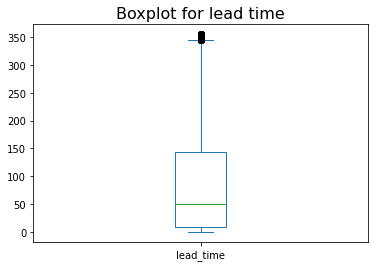

In [85]:
dfbh['lead_time'].plot(kind='box')
plt.title('Boxplot for lead time', size=16)
plt.show()


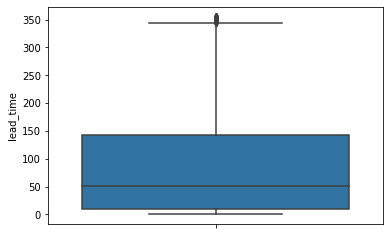

In [89]:
sns.boxplot(y=dfbh['lead_time'])

In [86]:
if (nilai_max > max_IQR):
    print('High outlier is found >', max_IQR)
    print('High outlier Index : ', list(dfbh[dfbh['lead_time'] > max_IQR].index))

High outlier is found > 355.0
High outlier Index :  []


In [88]:
if (nilai_min < min_IQR):                        
    print('Low outlier is found <', min_IQR)
    print('Low Outlier Index :', list(dfbh[dfbh['lead_time'] < min_IQR].index))

In [91]:
dfbh.reset_index(drop=True, inplace=True)

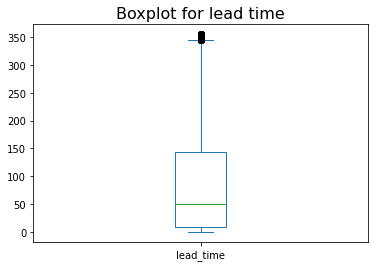

In [95]:
dfbh['lead_time'].plot(kind='box')
plt.title('Boxplot for lead time', size=16)
plt.show()

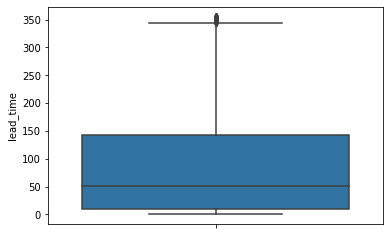

In [96]:
sns.boxplot(y=dfbh['lead_time'])

In [97]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34031 entries, 0 to 34030
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           34031 non-null  object 
 1   is_canceled                     34031 non-null  int64  
 2   lead_time                       34031 non-null  int64  
 3   arrival_date_year               34031 non-null  int64  
 4   arrival_date_month              34031 non-null  int64  
 5   arrival_date_week_number        34031 non-null  int64  
 6   arrival_date_day_of_month       34031 non-null  int64  
 7   stays_in_weekend_nights         34031 non-null  int64  
 8   stays_in_week_nights            34031 non-null  int64  
 9   adults                          34031 non-null  int64  
 10  children                        34031 non-null  float64
 11  babies                          34031 non-null  int64  
 12  meal                            

In [101]:
dfbh['credit_card'].isna().sum()

1

In [102]:
dfbh['credit_card'].value_counts()

************4288    13
************8484    13
************3642    13
************1504    13
************2222    12
                    ..
************3283     1
************1800     1
************4688     1
************9993     1
************7157     1
Name: credit_card, Length: 8772, dtype: int64

In [104]:
dfbh['credit_card'].fillna('************4288', inplace=True)

In [105]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34031 entries, 0 to 34030
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           34031 non-null  object 
 1   is_canceled                     34031 non-null  int64  
 2   lead_time                       34031 non-null  int64  
 3   arrival_date_year               34031 non-null  int64  
 4   arrival_date_month              34031 non-null  int64  
 5   arrival_date_week_number        34031 non-null  int64  
 6   arrival_date_day_of_month       34031 non-null  int64  
 7   stays_in_weekend_nights         34031 non-null  int64  
 8   stays_in_week_nights            34031 non-null  int64  
 9   adults                          34031 non-null  int64  
 10  children                        34031 non-null  float64
 11  babies                          34031 non-null  int64  
 12  meal                            

In [106]:
dfbh[~dfbh['credit_card'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,6697921661,************4322,2015,7,1
1,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,6528852745,************3734,2015,7,2
2,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,3646568427,************5677,2015,7,2
3,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,7132265883,************5498,2015,7,3
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,1,Check-Out,Jasmine Fletcher,JFletcher43@xfinity.com,1902716743,************9263,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34026,Resort Hotel,0,48,2017,3,12,23,2,5,2,...,0,0,Check-Out,Anna Taylor,Taylor_Anna@comcast.net,5243280192,************2455,2017,3,30
34027,Resort Hotel,0,163,2017,3,13,29,0,1,2,...,1,1,Check-Out,Ruth Williams,Williams.Ruth@outlook.com,2752612050,************6937,2017,3,30
34028,Resort Hotel,0,49,2017,3,13,29,0,1,1,...,0,1,Check-Out,Steven Harrell,Harrell_Steven@att.com,9581544396,************9572,2017,3,30
34029,Resort Hotel,0,338,2017,3,11,16,4,10,2,...,0,1,Check-Out,Sharon Cox,SharonCox38@gmail.com,3827419068,************7304,2017,3,30


In [108]:
dfbh.drop(columns=['credit_card'],axis=1, inplace=True)

In [109]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34031 entries, 0 to 34030
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           34031 non-null  object 
 1   is_canceled                     34031 non-null  int64  
 2   lead_time                       34031 non-null  int64  
 3   arrival_date_year               34031 non-null  int64  
 4   arrival_date_month              34031 non-null  int64  
 5   arrival_date_week_number        34031 non-null  int64  
 6   arrival_date_day_of_month       34031 non-null  int64  
 7   stays_in_weekend_nights         34031 non-null  int64  
 8   stays_in_week_nights            34031 non-null  int64  
 9   adults                          34031 non-null  int64  
 10  children                        34031 non-null  float64
 11  babies                          34031 non-null  int64  
 12  meal                            